In [1]:
import wrangle
import evaluate2 as evaluate
#standard ds
import pandas as pd
import numpy as np

#viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
train, val, test = wrangle.wrangle_wine()

In [3]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2391,6.40,0.46,0.08,4.90,0.05,34.00,144.00,0.99,3.10,0.56,10.00,5,white
989,9.70,0.29,0.40,1.50,0.07,14.00,21.00,1.00,3.14,0.51,10.90,6,red
2805,7.00,0.26,0.46,15.55,0.04,61.00,171.00,1.00,2.94,0.35,8.80,6,white
2909,5.20,0.36,0.08,13.50,0.04,37.00,142.00,1.00,3.46,0.39,9.90,6,white
41,8.80,0.61,0.30,2.80,0.09,17.00,46.00,1.00,3.26,0.51,9.30,4,red


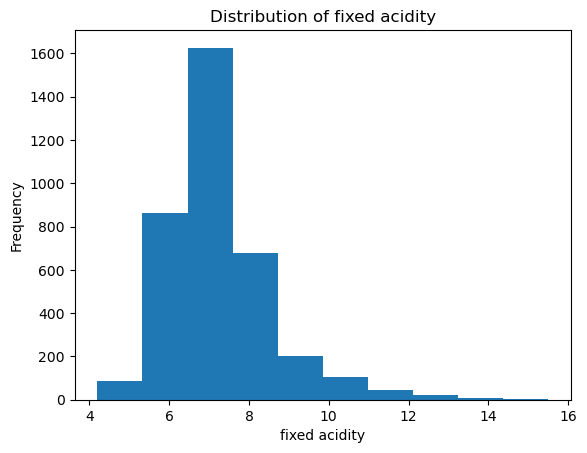

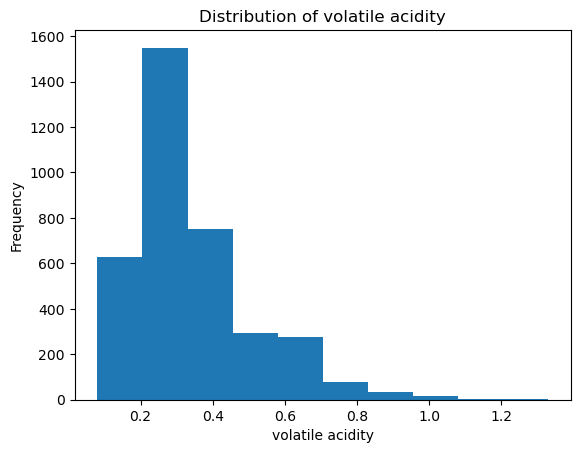

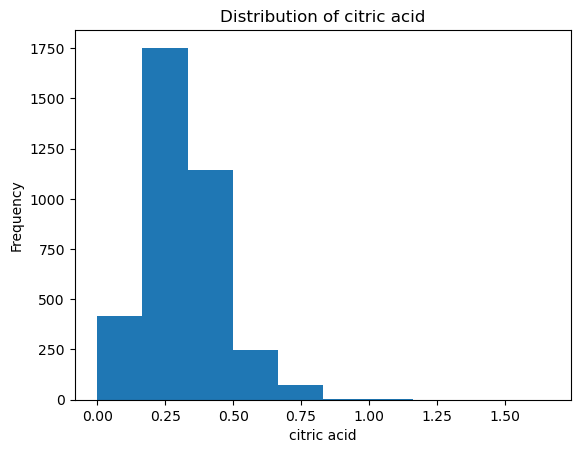

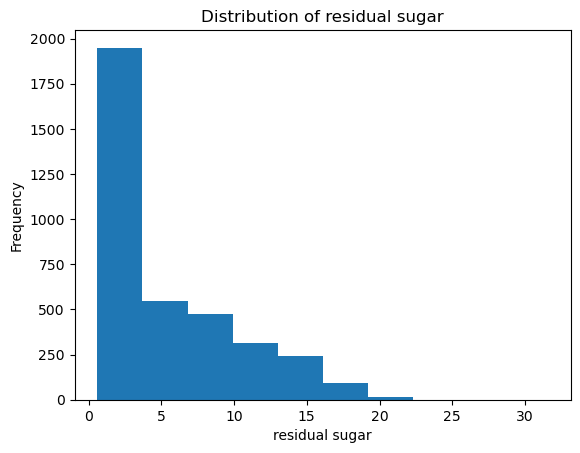

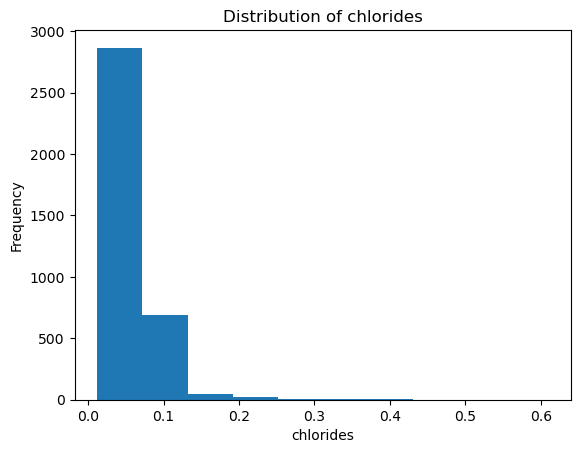

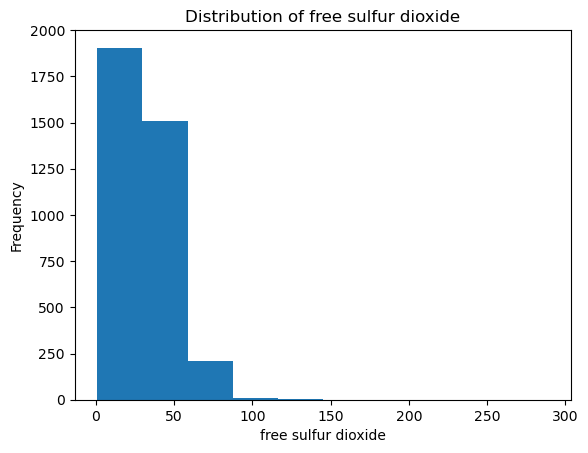

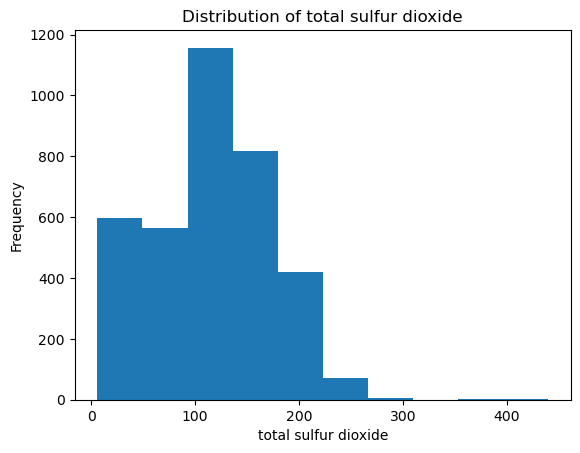

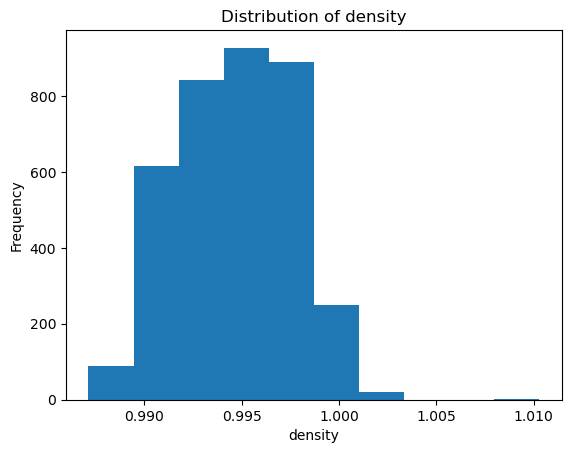

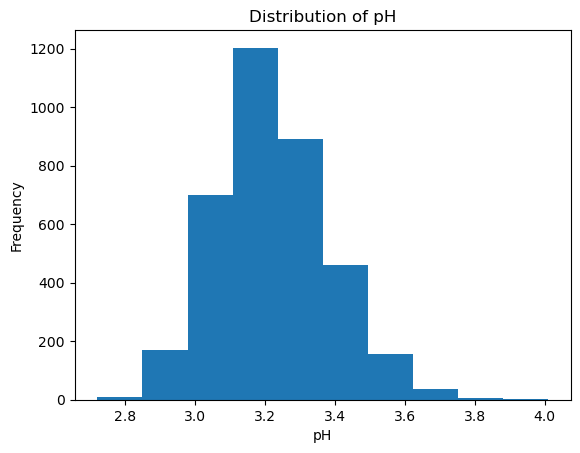

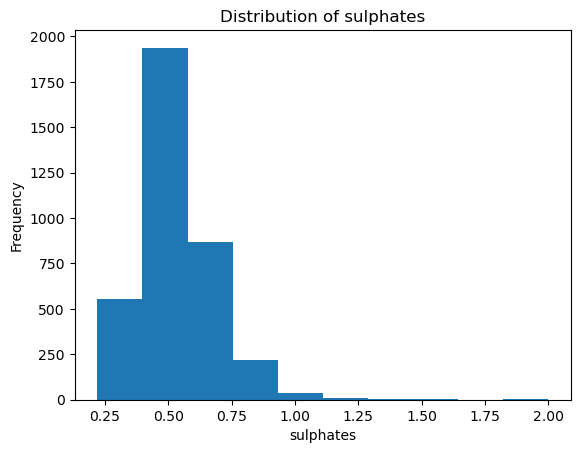

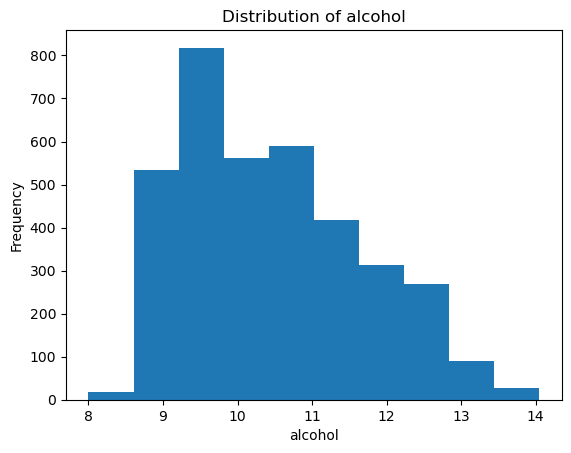

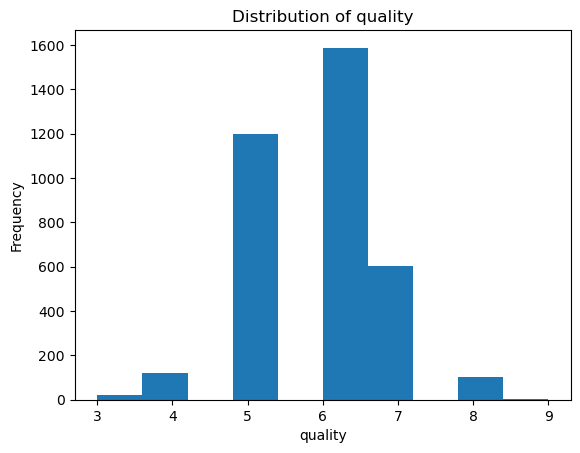

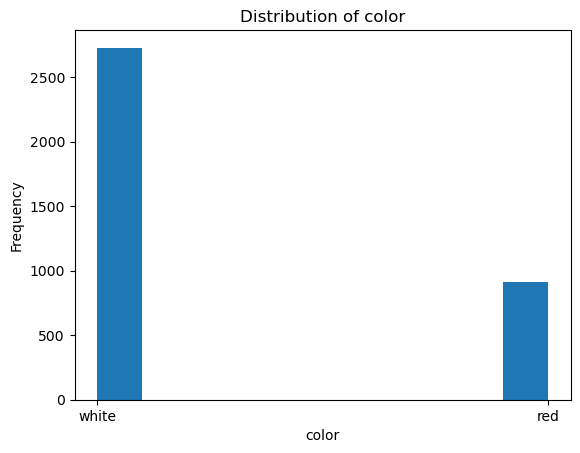

In [4]:
for col in train.columns:
    evaluate.show_distribution(train, col)

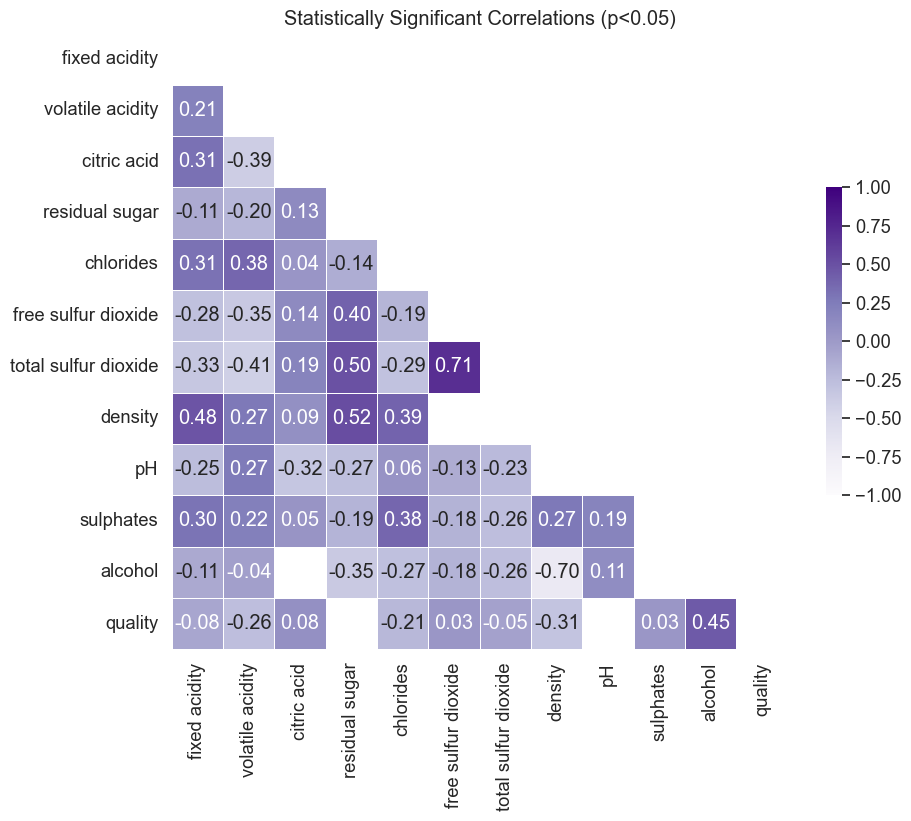

In [5]:
evaluate.visualize_corr(train.drop(columns='color'))

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy import stats

In [7]:
evaluate.select_kbest(train.drop(columns=['quality','color']), train.quality, k=4)

['volatile acidity', 'chlorides', 'density', 'alcohol']

In [8]:
evaluate.rfe(train.drop(columns=['quality','color']), train.quality, k=4)

['volatile acidity', 'chlorides', 'density', 'sulphates']

In [5]:
evaluate.print_corr_table(train.drop(columns='color'),'quality')

Correlation Coefficients and P-Values:
                      corr_coef  p_value
quality                    1.00     0.00
alcohol                    0.45     0.00
density                   -0.31     0.00
volatile acidity          -0.26     0.00
chlorides                 -0.21     0.00
citric acid                0.08     0.00
fixed acidity             -0.08     0.00
total sulfur dioxide      -0.05     0.00
free sulfur dioxide        0.03     0.04
sulphates                  0.03     0.04
pH                         0.03     0.13
residual sugar            -0.02     0.15


In [10]:
# sklearn:
# the thing that will do the clustering:
from sklearn.cluster import KMeans, DBSCAN
# the thing that will do the scaling:son
from sklearn.preprocessing import MinMaxScaler

In [7]:
train_scaled,val_scaled,test_scaled = evaluate.scale_data(train,val,test,columns_to_scale=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [21]:
train_scaled['kmean_clusters'] = kmean_clusters
train_scaled['DBSCAN_clusters'] = DBSCAN_clusters

In [24]:
train_scaled.DBSCAN_clusters.value_counts()

0    3637
Name: DBSCAN_clusters, dtype: int64

In [27]:
train_scaled.kmean_clusters.value_counts()

0    2081
2    1055
1     501
Name: kmean_clusters, dtype: int64

In [32]:
train_scaled['quality'],train_scaled['color'] = train.quality,train.color

In [34]:
train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,kmean_clusters,DBSCAN_clusters
2391,0.19,0.30,0.05,0.14,0.06,0.11,0.32,0.32,0.29,0.19,0.33,5,white,2,0
989,0.49,0.17,0.24,0.03,0.10,0.05,0.03,0.36,0.33,0.16,0.48,6,red,0,0
2805,0.25,0.14,0.28,0.48,0.04,0.21,0.38,0.50,0.17,0.07,0.13,6,white,0,0
2909,0.09,0.23,0.05,0.42,0.05,0.12,0.31,0.43,0.57,0.10,0.31,6,white,2,0
41,0.41,0.42,0.18,0.07,0.13,0.06,0.09,0.45,0.42,0.16,0.21,4,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,0.21,0.17,0.27,0.27,0.07,0.21,0.40,0.42,0.23,0.13,0.15,5,white,0,0
2701,0.19,0.06,0.24,0.03,0.04,0.20,0.33,0.18,0.56,0.17,0.56,5,white,0,0
6189,0.19,0.20,0.18,0.21,0.05,0.14,0.37,0.27,0.39,0.15,0.51,6,white,2,0
2133,0.28,0.14,0.22,0.41,0.09,0.18,0.40,0.45,0.22,0.15,0.17,6,white,0,0


In [37]:
coorcoef,pval=stats.pearsonr(train_scaled.quality,train_scaled.kmean_clusters)
print(coorcoef,pval)

-0.12467489306958746 4.498327274476837e-14


In [38]:
# we preprocessed! huzzah!
# lets make a clustering object from sklearn
# Make a thing! Thats my favorite!
k_means_prototype = KMeans(n_clusters=3)
# fit the thing!!!!
k_means_prototype.fit(train_scaled.drop(columns=['quality','color']))
# use the thing
kmean_clusters1 = k_means_prototype.predict(
    train_scaled.drop(columns=['quality','color']))

In [39]:
coorcoef,pval=stats.pearsonr(train_scaled.quality,kmean_clusters1)
print(coorcoef,pval)

-0.23917786066610763 1.7518702649099347e-48


In [44]:
train_scaled['clusters'] = kmean_clusters1

In [45]:
train_scaled.drop(columns='kmean_clusters1', inplace = True)

In [41]:
conditions = [
    (train.quality == 3) | (train.quality == 4) | (train.quality == 5),
    (train.quality == 6),
    (train.quality == 7) | (train.quality == 8) | (train.quality == 9)
]

values = ['low', 'medium', 'high']

train['quality_bins'] = np.select(conditions, values, default=np.nan)

In [42]:
conditions = [
    (train_scaled.quality == 3) | (train_scaled.quality == 4) | (train_scaled.quality == 5),
    (train_scaled.quality == 6),
    (train_scaled.quality == 7) | (train_scaled.quality == 8) | (train_scaled.quality == 9)
]

values = ['low', 'medium', 'high']

train_scaled['quality_bins'] = np.select(conditions, values, default=np.nan)

In [49]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'quality_bins'],
      dtype='object')

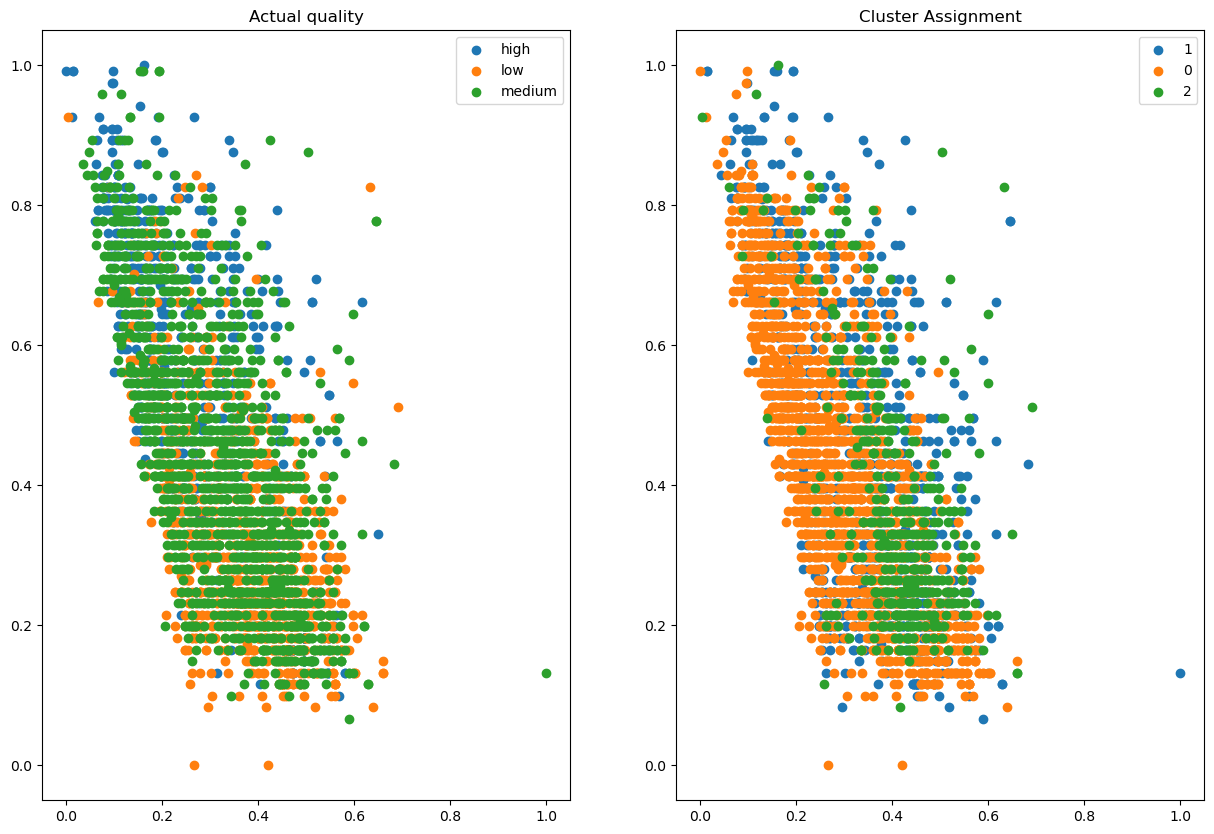

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for quality_bin, subset in train_scaled.groupby('quality_bins'):
    axs[0].scatter(subset.density,
                   subset.alcohol,
                   label=quality_bin)
axs[0].legend()
axs[0].set(title='Actual quality')

for cluster in train_scaled.clusters.unique():
    axs[1].scatter(train_scaled[train_scaled.clusters == cluster].density,
             train_scaled[train_scaled.clusters == cluster].alcohol,
               label=cluster)
axs[1].legend()
axs[1].set(title='Cluster Assignment')

plt.show()

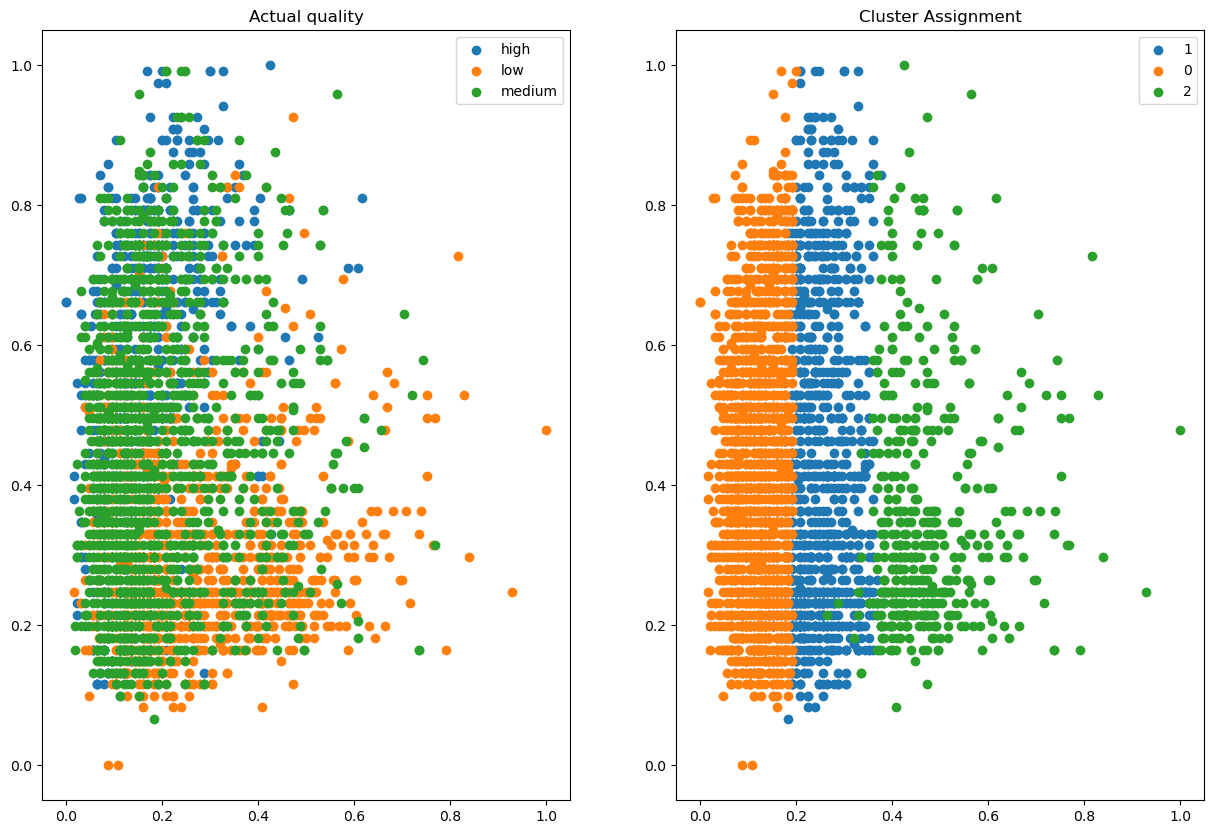

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for quality_bin, subset in train_scaled.groupby('quality_bins'):
    axs[0].scatter(subset['volatile acidity'],
                   subset.alcohol,
                   label=quality_bin)
axs[0].legend()
axs[0].set(title='Actual quality')

for cluster in train_scaled.clusters.unique():
    axs[1].scatter(train_scaled[train_scaled.clusters == cluster]['volatile acidity'],
             train_scaled[train_scaled.clusters == cluster].alcohol,
               label=cluster)
axs[1].legend()
axs[1].set(title='Cluster Assignment')

plt.show()

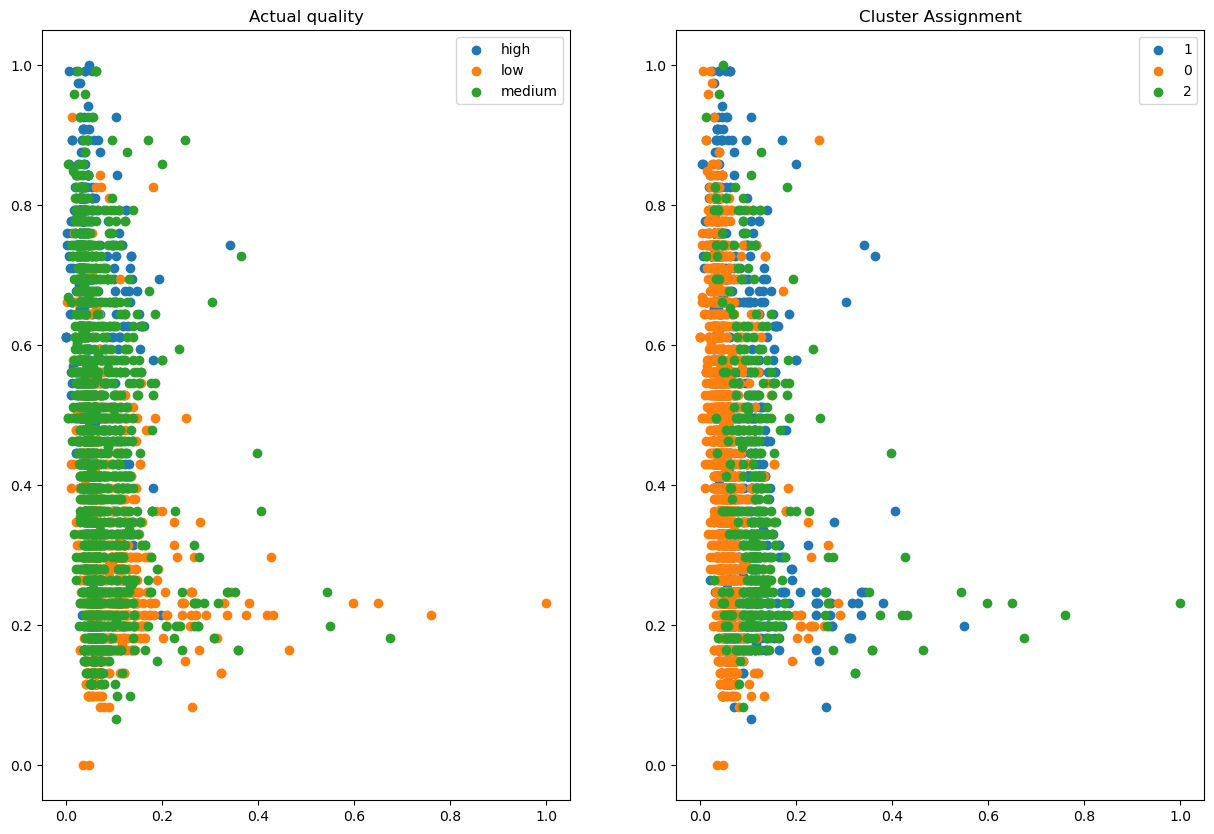

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for quality_bin, subset in train_scaled.groupby('quality_bins'):
    axs[0].scatter(subset.chlorides,
                   subset.alcohol,
                   label=quality_bin)
axs[0].legend()
axs[0].set(title='Actual quality')

for cluster in train_scaled.clusters.unique():
    axs[1].scatter(train_scaled[train_scaled.clusters == cluster].chlorides,
             train_scaled[train_scaled.clusters == cluster].alcohol,
               label=cluster)
axs[1].legend()
axs[1].set(title='Cluster Assignment')

plt.show()

Lazy classifier with dbscan kmeans clusters, kclusters and quality bins

In [56]:
evaluate.run_lazy_classifier(train_scaled.drop(columns=['quality','color']), 'quality_bins')

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.62it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.68               0.65    None      0.68   
LGBMClassifier                     0.66               0.64    None      0.65   
ExtraTreesClassifier               0.66               0.64    None      0.66   
BaggingClassifier                  0.63               0.63    None      0.63   
LabelPropagation                   0.61               0.60    None      0.61   
LabelSpreading                     0.60               0.60    None      0.60   
NuSVC                              0.62               0.60    None      0.62   
SVC                                0.62               0.58    None      0.62   
DecisionTreeClassifier             0.57               0.57    None      0.57   
KNeighborsClassifier               0.56               0.56    None      0.56   
LinearDiscriminantAnalysis         0.58 

Lazy regressor with dbscan kmeans clusters, kclusters and quality bins

In [58]:
evaluate.run_lazy_regressor(train_scaled.drop(columns='color'), 'quality')

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [04:40<00:00,  6.67s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.90       0.90  0.27        0.37
RandomForestRegressor                        0.90       0.90  0.28        1.06
HistGradientBoostingRegressor                0.89       0.90  0.28        0.85
LGBMRegressor                                0.89       0.90  0.28        0.15
SGDRegressor                                 0.89       0.89  0.28        0.02
TransformedTargetRegressor                   0.89       0.89  0.28        0.03
LinearRegression                             0.89       0.89  0.28        0.02
RidgeCV                                      0.89       0.89  0.28        0.02
BayesianRidge                                0.89       0.89  0.28        0.03
Ridge                                        0.89       0.89  0.28        0.03
Lars                                         0.89   

lazy classifier w/o dbscan,kmeanclusters,clusters,dbscans,quaility, color

In [60]:
evaluate.run_lazy_classifier(train_scaled.drop(columns=['quality', 'color', 'kmean_clusters',
       'DBSCAN_clusters', 'clusters']), 'quality_bins')

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.75it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             0.91               0.51    None      0.91   
LabelPropagation                   0.88               0.50    None      0.88   
LabelSpreading                     0.88               0.50    None      0.88   
ExtraTreeClassifier                0.88               0.49    None      0.89   
BaggingClassifier                  0.92               0.48    None      0.91   
RandomForestClassifier             0.93               0.48    None      0.91   
ExtraTreesClassifier               0.93               0.48    None      0.91   
LGBMClassifier                     0.93               0.47    None      0.91   
GaussianNB                         0.91               0.46    None      0.90   
LogisticRegression                 0.93               0.46    None      0.90   
KNeighborsClassifier               0.90 

In [68]:
evaluate.run_lazy_classifier(train_scaled.drop(columns=['quality', 'color', 'kmean_clusters',
       'DBSCAN_clusters']), 'quality_bins')

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.75it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.68               0.65    None      0.67   
ExtraTreesClassifier               0.68               0.65    None      0.68   
LGBMClassifier                     0.66               0.65    None      0.66   
BaggingClassifier                  0.64               0.64    None      0.64   
NuSVC                              0.63               0.60    None      0.63   
LabelPropagation                   0.60               0.60    None      0.60   
LabelSpreading                     0.60               0.60    None      0.60   
DecisionTreeClassifier             0.58               0.58    None      0.58   
SVC                                0.63               0.58    None      0.62   
QuadraticDiscriminantAnalysis      0.53               0.56    None      0.53   
GaussianNB                         0.53 

In [64]:
evaluate.run_lazy_regressor(train_scaled.drop(columns=[ 'color', 'kmean_clusters',
       'DBSCAN_clusters', 'clusters','quality_bins']), 'quality')

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [04:33<00:00,  6.50s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.44       0.45  0.65        0.68
RandomForestRegressor                        0.42       0.43  0.66        1.44
LGBMRegressor                                0.40       0.41  0.67        0.13
HistGradientBoostingRegressor                0.40       0.40  0.67        0.79
GradientBoostingRegressor                    0.38       0.39  0.68        0.47
MLPRegressor                                 0.37       0.38  0.69        3.42
BaggingRegressor                             0.37       0.38  0.69        0.21
NuSVR                                        0.37       0.38  0.69        0.53
SVR                                          0.37       0.37  0.69        0.67
XGBRegressor                                 0.35       0.36  0.70        0.20
TransformedTargetRegressor                   0.30   

In [67]:
evaluate.run_lazy_regressor(train_scaled.drop(columns=[ 'color', 'kmean_clusters',
       'DBSCAN_clusters', 'clusters','quality']), 'quality_bins')

100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 112.55it/s]

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []


In [59]:
train_scaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'kmean_clusters',
       'DBSCAN_clusters', 'quality_bins', 'clusters'],
      dtype='object')

In [40]:
pval<0.5

True

In [10]:
X_cols = train.drop(columns= ['quality','color']).columns

In [11]:
X_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [12]:
y_cols = train.quality

In [22]:
train_scaled, val_scaled, test_scaled = evaluate.scale_data(train,val,test,columns_to_scale=X_cols)

In [25]:
from sklearn.cluster import KMeans

In [30]:
k_means_prototype = KMeans(n_clusters=7)
k_means_prototype.fit(train_scaled[X_cols])
clusters = k_means_prototype.predict(train_scaled[X_cols]) 

In [31]:
train_scaled['cluster_assigned'] = clusters

In [ ]:
plt.figure(figsize=(12,12))
for cluster in train_scaled.cluster_assigned.unique():
    plt.scatter(train_scaled[train_scaled.cluster_assigned == cluster].alcohol,
             train_scaled[train_scaled.cluster_assigned == cluster].cholorides,
               label=cluster)
plt.title('Clusters????')
plt.legend()
plt.show()

In [ ]:
sns.scat

In [14]:
conditions = [
    (train.quality == 3) | (train.quality == 4) | (train.quality == 5),
    (train.quality == 6) | (train.quality == 7),
    (train.quality == 8) | (train.quality == 9)
]

values = ['low', 'medium', 'high']

train['quality_bins'] = np.select(conditions, values, default=np.nan)

In [15]:
train.quality_bins.value_counts()

medium    2191
low       1337
high       109
Name: quality_bins, dtype: int64

In [16]:
train.quality.value_counts()

6    1587
5    1198
7     604
4     119
8     104
3      20
9       5
Name: quality, dtype: int64

In [17]:
val.quality.value_counts()

6    675
5    523
7    258
4     53
8     46
3      5
Name: quality, dtype: int64

In [18]:
test.quality.value_counts()

6    574
5    417
7    217
4     44
8     43
3      5
Name: quality, dtype: int64

In [19]:
red = pd.read_csv('https://query.data.world/s/6ydfnt5m4fjpceorhly36l6wlw6kas?dws=00000')

In [20]:
conditions = [
    (red.quality == 3) | (red.quality == 4) | (red.quality == 5),
    (red.quality == 6) | (red.quality == 7)| (red.quality == 8) | (red.quality == 9)
]

values = ['low', 'high']

red['quality_bins'] = np.select(conditions, values, default=np.nan)

NameError: name 'plt' is not defined

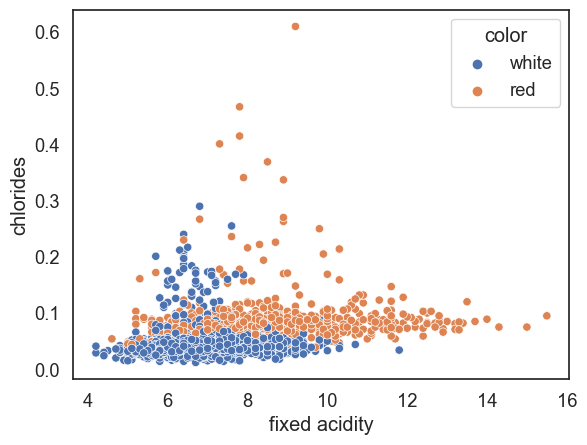

In [21]:
for traincol in train.columns:
    sns.scatterplot(x= train[traincol], y=train.chlorides, hue=train.color)
    plt.show()

In [ ]:
for redcol in red.columns:
    sns.scatterplot(x= red[redcol], y=red.chlorides, hue=red.quality_bins)
    plt.show()

In [ ]:
figsize=(20, 20)
sns.scatterplot(x= red.alcohol, y=red.chlorides, hue=red.quality_bins)
plt.show()

In [9]:
conditions = [
    (train.quality == 3) | (train.quality == 4) | (train.quality == 5),
    (train.quality == 6), 
    (train.quality == 7) | (train.quality == 8) | (train.quality == 9)
]


values = ['low', 'medium', 'high']

train['quality_bins'] = np.select(conditions, values, default=np.nan)

In [10]:
train = evaluate.remove_outliers(train, k=1.5, col_list= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [20]:
X_cols = train.drop(columns= ['quality','color','quality_bins']).columns

In [33]:
train.shape

(2538, 14)

In [36]:
trainsamp1 = train.sample(300, random_state=42)

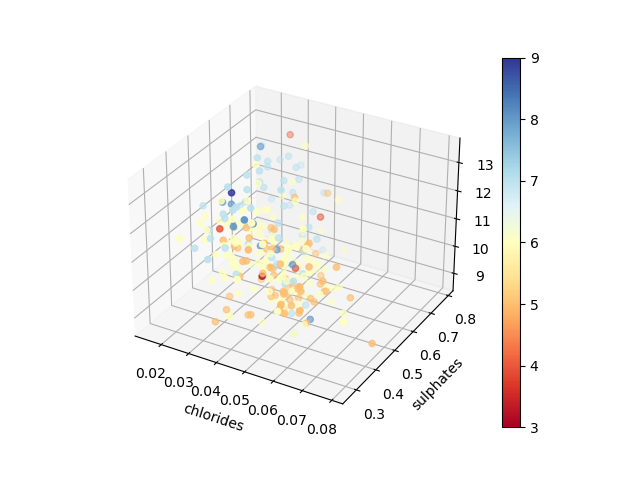

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')

# Create data points
z = trainsamp1.alcohol[trainsamp1.color == 'white']
x = trainsamp1.chlorides[trainsamp1.color == 'white']
y = trainsamp1.sulphates[trainsamp1.color == 'white']
# Create variable for hue
hue = trainsamp1.quality[trainsamp1.color == 'white']

# Create colormap
cmap = plt.cm.get_cmap('RdYlBu')

# Create scatter plot with hue based on variable
scatter = ax.scatter(x, y, z, c=hue, cmap=cmap, marker='o')

# Set colorbar
plt.colorbar(scatter)

# Set axis labels
ax.set_zlabel('alcohol')
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')

# Show the plot
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create data points
z = train.alcohol[train.color == 'white']
x = train.chlorides[train.color == 'white']
y = train.volitile_acidity[train.color == 'white']
# Create variable for hue
hue = train.quality[train.color == 'white']

# Create colormap
cmap = plt.cm.get_cmap('RdYlBu')

# Create scatter plot with hue based on variable
scatter = ax.scatter(x, y, z, c=hue, cmap=cmap, marker='o')

# Set colorbar
plt.colorbar(scatter)

# Set axis labels
ax.set_zlabel('alcohol')
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')

# Show the plot
plt.show()